[View in Colaboratory](https://colab.research.google.com/github/x110/KaggleComp/blob/master/imaterialist_challenge_furniture_2018.ipynb)

# A Model for Auromatic Product Recognition


##Introduction 

The objective of this notebook is to create a submission for the Imaterialist Challenge (Furniture) 2018 Kaggle competition. "In this competition, FGVC5 workshop organizers and Malong Technologies challenge you to develop algorithms that will help with an important step towards **automatic product recognition **– to accurately assign category labels for furniture and home goods images." More information about the challenge can be found here: https://www.kaggle.com/c/imaterialist-challenge-furniture-2018

Here, we will see how well do "over the counter" models with minimum fine tuning perform in recognizing furniture products. # Prepare virtual machine on google colab
* Connect to google drive
* Install dependencies

Thanks for Google colab for providing access to free GPUs!!We will start by building the infrastructure to develop our deep learning model. We need to install the dependencies on the GPU instance and also connect the GPU to a google drive where the dataset will be hosted. 


## Prepare virtual machine on google colab

1. Connect to google drive
2. Install dependencies

In [1]:
!ls

datalab


In [2]:
!pip install https://github.com/fastai/fastai/archive/master.zip
!pip install opencv-python
!apt update && apt install -y libsm6 libxext6
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

     \ 90.1MB 12.7MB/s
    100% |████████████████████████████████| 1.5MB 15.7MB/s 
    100% |████████████████████████████████| 112kB 21.1MB/s 
    100% |████████████████████████████████| 174kB 19.7MB/s 
    100% |████████████████████████████████| 3.4MB 11.0MB/s 
    0% |▎                               | 4.2MB 36.4MB/s eta 0:00:14

    100% |████████████████████████████████| 496.4MB 31kB/s 
    100% |████████████████████████████████| 51kB 18.1MB/s 
    100% |████████████████████████████████| 61kB 18.5MB/s 
    100% |████████████████████████████████| 51kB 13.3MB/s 
    100% |████████████████████████████████| 2.2MB 12.4MB/s 
    100% |████████████████████████████████| 13.7MB 3.2MB/s 
    100% |████████████████████████████████| 92kB 24.2MB/s 
    100% |████████████████████████████████| 112kB 21.0MB/s 
    100% |████████████████████████████████| 71kB 20.0MB/s 


    100% |████████████████████████████████| 81kB 20.9MB/s 
  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-g6xghygw/wheels/64/3d/9f/d12a217aa2531321c5b9ae96288fcae2687d3b744376e8f94f
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | /

 - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /content/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
Successfully built fastai bcolz feather-format pandas-summary torchtext
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
torchvision 0.2.1 has 

0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
    100% |████████████████████████████████| 592.3MB 51.5MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: torch 0.3.1
    Uninstalling torch-0.3.1:
      Successfully uninstalled torch-0.3.1
    100% |████████████████████████████████| 2.0MB 14.6MB/s 


plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [3]:
## Connect to google drive for storage 
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!mkdir -p drive
!google-drive-ocamlfuse drive
!apt-get install p7zip-full

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  p7zip
Suggested packages:
  p7zip-rar
The following NEW packages will be installed:
  p7zip p7zip-full
0 upgraded, 2 newly installed, 0 to remove and 21 not upg

In [27]:
!ls

data  datalab  drive  train0  train1  train2  train3  train4  train5


In [5]:
## More dependencies
!pip install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/f1/34/79/fe71f4c2bf112baedf4e5c62e07cdecc018e793c735873afe6
Successfully built kaggle
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [0]:
!mkdir .kaggle

In [0]:
!cp drive/kaggle.json /content/.kaggle/

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [9]:
#install More dependencies
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
!apt-get install p7zip-full

    100% |████████████████████████████████| 5.6MB 9.0MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
    100% |████████████████████████████████| 7.1MB 7.1MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-4).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


## Download Kaggle Dataset


In [0]:
!mkdir data
!mkdir data/train

In [0]:
!unzip -qq drive/test.zip -d data
!unzip -qq drive/valid.zip -d data

In [0]:
!mkdir train0
!unzip -qq drive/train_chunk0.zip -d train0
!mkdir train1
!unzip -qq drive/train_chunk1.zip -d train1
!mkdir train2
!unzip -qq drive/train_chunk2.zip -d train2
!mkdir train3
!unzip -qq drive/train_chunk3.zip -d train3
!mkdir train4
!unzip -qq drive/train_chunk4.zip -d train4
!mkdir train5
!unzip -qq drive/train_chunk5.zip -d train5


In [0]:
import pathlib
for i in range(1,129):
  p = pathlib.Path(f'data/train/{i}').mkdir(exist_ok=True)

In [0]:
for j in range(0,5):
  for i in range(1,129):
    cmd = f'train{j}/{i}/* data/train/{i}/'
    !mv {cmd}

In [15]:
!kaggle competitions download -c imaterialist-challenge-furniture-2018
!cp .kaggle/competitions/imaterialist-challenge-furniture-2018/train.json data/

 84%|███████████████████████████████▉      | 36.0M/42.8M [00:00<00:00, 25.3MB/s]
100%|██████████████████████████████████████| 42.8M/42.8M [00:00<00:00, 72.7MB/s]
  0%|                                               | 0.00/1.39M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 1.39M/1.39M [00:00<00:00, 278MB/s]
  0%|                                               | 0.00/2.00M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 2.00M/2.00M [00:00<00:00, 301MB/s]
  0%|                                                | 0.00/116k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 116k/116k [00:00<00:00, 122MB/s]


In [0]:
#uncomment to refresh google drive
#!google-drive-ocamlfuse -cc
#!ls drive

# Imports


In [0]:
# Imports
%matplotlib inline
#%reload_ext autoreload
#%autoreload 2

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from pathlib import Path
import json
import pathlib

# Explore Data

First, lets have a look at the data

In [30]:
PATH = pathlib.Path(".kaggle/competitions/imaterialist-challenge-furniture-2018")
list(PATH.iterdir())

[PosixPath('.kaggle/competitions/imaterialist-challenge-furniture-2018/test.json'),
 PosixPath('.kaggle/competitions/imaterialist-challenge-furniture-2018/sample_submission_randomlabel.csv'),
 PosixPath('.kaggle/competitions/imaterialist-challenge-furniture-2018/train.json'),
 PosixPath('.kaggle/competitions/imaterialist-challenge-furniture-2018/validation.json')]

In [0]:
trn_j = json.load((PATH/'train.json').open())

In [32]:
trn_j.keys()

dict_keys(['images', 'annotations'])

In [33]:
len(trn_j['images'])

194828

The number of the training examples are 194828. Lets look at the first sample:

In [34]:
trn_j['images'][0]

{'image_id': 1,
 'url': ['https://img13.360buyimg.com/imgzone/jfs/t2857/351/510705008/279959/4e27dce0/57171f60N523c940e.jpg']}

In [35]:
trn_j['annotations'][0]

{'image_id': 1, 'label_id': 5}

# Model

In [0]:
#split data into train and validation
PATH = pathlib.Path("/content/data")
#valid_idxs = get_cv_idxs(len(df3))

In [0]:
def get_data(sz,bs,arch):
    tfms = tfms_from_model(arch, sz,aug_tfms=transforms_side_on,max_zoom=1.1)
    data = ImageClassifierData.from_paths(PATH,tfms=tfms,bs=bs,test_name='test')
    return data
  

In [0]:
sz=50
arch = resnet34
bs=512
data = get_data(sz,bs,arch)


In [28]:
learn = ConvLearner.pretrained(arch,data,precompute=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 51788601.02it/s]


100%|██████████| 25/25 [02:03<00:00,  4.95s/it]


 97%|█████████▋| 265/274 [01:05<00:02,  4.07it/s, loss=16.3]

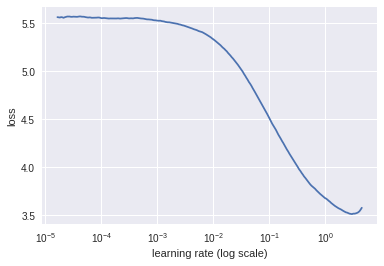

In [32]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr=.05

In [34]:
learn.fit(lr,3)

epoch      trn_loss   val_loss   accuracy   
    0      2.749241   2.540362   0.365193  
    1      2.51695    2.397484   0.394674  
 23%|██▎       | 64/274 [00:09<00:30,  6.92it/s, loss=2.47]

    2      2.438684   2.337472   0.406087  


[array([2.33747]), 0.40608654338804473]

In [0]:
learn.save("/content/drive/resnet_50")
learn.load("/content/drive/resnet_50")

In [37]:
learn.fit(lr,3)

epoch      trn_loss   val_loss   accuracy   
    0      2.380525   2.271934   0.417499  
    1      2.321193   2.245263   0.423522  
 24%|██▎       | 65/274 [00:09<00:30,  6.93it/s, loss=2.29]

    2      2.306488   2.221125   0.433508  


[array([2.22112]), 0.43350768735507417]

In [0]:
learn.save("/content/drive/resnet_50")
learn.load("/content/drive/resnet_50")

In [39]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      2.227139   2.210113   0.438104  
    1      2.239524   2.183388   0.441908  
 24%|██▍       | 66/274 [00:09<00:29,  7.09it/s, loss=2.19]

    2      2.190922   2.163794   0.44809   


[array([2.16379]), 0.4480900303424491]

In [0]:
learn.save("/content/drive/resnet_50")
learn.load("/content/drive/resnet_50")

In [41]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      2.195608   2.158666   0.446029  
    1      2.200153   2.163464   0.444286  
 23%|██▎       | 64/274 [00:08<00:29,  7.24it/s, loss=2.17]

    2      2.149952   2.151554   0.450943  


[array([2.15155]), 0.45094309693604195]

 97%|█████████▋| 265/274 [00:34<00:01,  7.69it/s, loss=16.3]

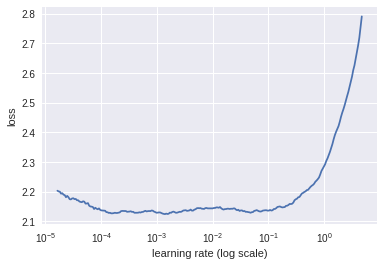

In [44]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr = .01

In [0]:
learn.precompute = False

In [47]:
learn.fit(lr,3)

epoch      trn_loss   val_loss   accuracy   
    0      2.186376   2.126775   0.455698  
 82%|████████▏ | 225/274 [19:06<04:09,  5.09s/it, loss=2.16]

    1      2.167535   2.125244   0.45126   
    2      2.15868    2.122263   0.456174  


[array([2.12226]), 0.45617372080988394]

In [0]:
learn.save("/content/drive/resnet_50_1")

In [28]:
learn.load("/content/drive/resnet_50_1")

NameError: ignored

 97%|█████████▋| 267/274 [22:35<00:35,  5.08s/it, loss=25.3]


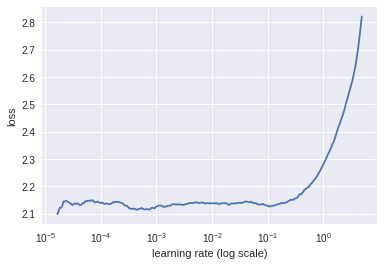

In [25]:
learn.lr_find()
learn.sched.plot()

In [0]:
learn.unfreeze()

In [0]:
lr = .001
lrs = [lr/100,lr/10,lr]

In [29]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      2.288883   2.218962   0.429545  
 82%|████████▏ | 226/274 [20:05<04:15,  5.33s/it, loss=1.98]

    1      1.948729   1.939973   0.482961  
    2      1.830315   1.908176   0.492154  



[array([1.90818]), 0.49215406559219943]

In [0]:
learn.save("/content/drive/resnet_50_1")

In [11]:
learn.load("/content/drive/resnet_50_1")

NameError: ignored

In [0]:
sz=100
data = get_data(sz,bs,arch)
learn.set_data(data)

 97%|█████████▋| 267/274 [24:45<00:38,  5.56s/it, loss=30.1]

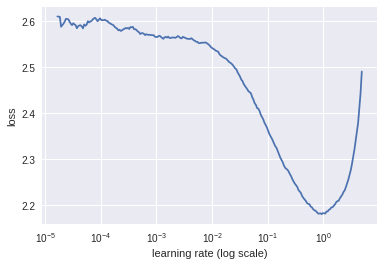

In [36]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr = .1

In [0]:
learn.freeze()

In [0]:
learn.precompute = False

In [44]:
learn.fit(lr,1)

epoch      trn_loss   val_loss   accuracy   
    0      1.795487   1.692475   0.532414  


[array([1.69247]), 0.5324140112946879]

In [0]:
learn.precompute = False

In [0]:
learn.save("/content/drive/resnet_50_1")

In [0]:
learn.load("/content/drive/resnet_50_1")

In [0]:
learn.unfreeze()

In [52]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      1.104393   1.09054    0.6822    
 82%|████████▏ | 226/274 [22:06<04:41,  5.87s/it, loss=1.07]

    1      1.00692    1.151322   0.661912  
    2      0.651986   0.89334    0.738786  


[array([0.89334]), 0.7387858611748702]

In [0]:
learn.save("/content/drive/resnet_50_1")

In [54]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.695859   0.903675   0.737518  
 81%|████████  | 222/274 [21:43<05:05,  5.87s/it, loss=0.806]

    1      0.762961   1.0197     0.714693  
    2      0.441895   0.856427   0.757806  


[array([0.85643]), 0.7578063090623398]

In [0]:
learn.save("/content/drive/resnet_50_1")

In [26]:
sz=100
arch = resnet34
bs=512
data = get_data(sz,bs,arch)
learn = ConvLearner.pretrained(arch,data,precompute=False)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 49510332.00it/s]


In [0]:
learn.load("/content/drive/resnet_50_1")

In [0]:
sz=300
arch = resnet34
bs = 128
data = get_data(sz,bs,arch)
learn = ConvLearner.pretrained(arch,data,precompute=False)
learn.set_data(data)
data = data.resize(int(sz*1.3),'tmp')

In [0]:
learn.freeze()

In [0]:
learn.precompute = False

 87%|████████▋ | 951/1094 [48:11<07:14,  3.04s/it, loss=6.29]

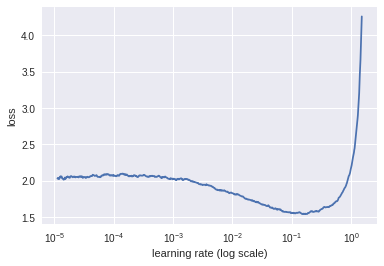

In [48]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr = .05

In [0]:
learn.precompute = False
learn.freeze()

In [33]:
learn.fit(lr,5)

epoch      trn_loss   val_loss   accuracy   
    0      1.317396   1.193919   0.650658  
 30%|███       | 333/1094 [16:54<38:38,  3.05s/it, loss=1.26]

    1      1.217988   1.133951   0.667459  
  3%|▎         | 32/1094 [01:52<1:02:26,  3.53s/it, loss=1.19]

    2      1.207281   1.090453   0.680139  
  0%|          | 0/1094 [00:18<?, ?it/s, loss=1.21]

    3      1.143942   1.068837   0.684419  
  0%|          | 0/1094 [00:19<?, ?it/s, loss=1.15]

    4      1.147638   1.047643   0.689016  



[array([1.04764]), 0.6890156919254443]

In [0]:
learn.save("/content/drive/resnet_50_300")

In [35]:
learn.fit(lr,5)

epoch      trn_loss   val_loss   accuracy   
    0      1.120206   1.029402   0.695356  
 30%|███       | 333/1094 [16:53<38:36,  3.04s/it, loss=1.1] 

    1      1.092599   1.021789   0.700111  
  3%|▎         | 33/1094 [01:53<1:00:44,  3.43s/it, loss=1.07]

    2      1.098397   1.011539   0.70233   
  0%|          | 0/1094 [00:15<?, ?it/s, loss=1.1]

    3      1.082416   1.013686   0.700586  
  0%|          | 0/1094 [00:16<?, ?it/s, loss=1.08]

    4      1.068734   0.992273   0.707561  



[array([0.99227]), 0.7075606275424845]

In [0]:
learn.save("/content/drive/resnet_50_300")

In [0]:
learn.load("/content/drive/resnet_50_300")

In [0]:
learn.unfreeze()

 84%|████████▍ | 923/1094 [1:08:10<12:37,  4.43s/it, loss=3.77]

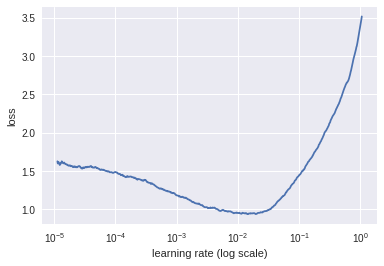

In [34]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr=.001

In [0]:
lrs = [lr/100,lr/10,lr]

In [32]:
learn.fit(lrs,3)

epoch      trn_loss   val_loss   accuracy   
    0      1.079245   1.025482   0.695831  
 30%|███       | 329/1094 [24:50<57:45,  4.53s/it, loss=1.05]

    1      0.967097   0.956411   0.711523  
  2%|▏         | 20/1094 [01:40<1:30:18,  5.05s/it, loss=0.98]

    2      0.91139    0.916432   0.726581  



[array([0.91643]), 0.7265810744946459]

In [0]:
learn.save("/content/drive/resnet_50_300_2")

In [34]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.829857   0.841986   0.747504  
 30%|██▉       | 327/1094 [24:47<58:09,  4.55s/it, loss=0.812]

    1      0.768247   0.78621    0.76589   
  1%|▏         | 16/1094 [01:28<1:39:51,  5.56s/it, loss=0.766]

    2      0.719063   0.780045   0.768426  



[array([0.78005]), 0.7684260581068388]

In [0]:
learn.save("/content/drive/resnet_50_300_2")

In [0]:
learn.load("/content/drive/resnet_50_300_2")

In [30]:
learn.unfreeze()
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.716076   0.777595   0.769536  
 30%|██▉       | 327/1094 [26:04<1:01:09,  4.78s/it, loss=0.725]

    1      0.707578   0.772534   0.770804  
  1%|▏         | 15/1094 [01:22<1:39:21,  5.52s/it, loss=0.696]

    2      0.70808    0.771465   0.769536  
  0%|          | 0/1094 [00:21<?, ?it/s, loss=0.711]

    3      0.71054    0.768413   0.770011  
  0%|          | 0/1094 [00:19<?, ?it/s, loss=0.707]

    4      0.700357   0.766043   0.772389  
  0%|          | 0/1094 [00:21<?, ?it/s, loss=0.703]

    5      0.714627   0.767692   0.76906   
  0%|          | 0/1094 [00:19<?, ?it/s, loss=0.716]

    6      0.698171   0.766489   0.768743  



[array([0.76649]), 0.7687430653014299]

In [0]:
learn.save("/content/drive/resnet_50_300_3")

In [0]:
learn.load("/content/drive/resnet_50_300_3")

## Predict based on the best model

In [0]:
sz=300
arch = resnet34
bs = 128
data = get_data(sz,bs,arch)
learn = ConvLearner.pretrained(arch,data,precompute=False)
learn.set_data(data)
learn.load("/content/drive/resnet_50_300_3")

In [0]:
log_preds = learn.predict()

In [42]:
log_preds.shape

(6309, 128)

In [72]:
probs1 = np.exp(log_preds)
probs1

array([[0.99963, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.94268, 0.     , 0.     , ..., 0.     , 0.     , 0.00416],
       [0.09253, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.99897],
       [0.     , 0.00103, 0.     , ..., 0.     , 0.     , 0.99565],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.98868]], dtype=float32)

In [0]:
p1 = np.argmax(np.exp(log_preds),axis=1)


In [52]:
y= data.val_y
y.shape

(6309,)

In [73]:
accuracy_np(probs1,y)

0.7687430654620384

## Predict based on an ensembel of two models.
This is an experiment. I have three models trained on different sizes: 50, 100, and 300. How will the prediction improve if I where to use an ensembel of those models. 
  

### load the second model

In [0]:
sz=100
arch = resnet34
bs = 128
data = get_data(sz,bs,arch)
learn = ConvLearner.pretrained(arch,data,precompute=False)
learn.set_data(data)
learn.load("/content/drive/resnet_50_1")

In [69]:
log_preds = learn.predict()
probs2 = np.exp(log_preds)
accuracy_np(probs2,y)

0.7578063084482486

In [0]:
p2 = np.argmax(np.exp(log_preds),axis=1)


In [0]:
probse = (2*probs1+probs2)/3.

In [77]:
accuracy_np(probse,y)

0.7901410683151054